In [48]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import API key
#from config import key

# import seaborn as sns
### importing modules for gmplots - plot og google map
import gmaps
import gmplot
### importing modules for plot on screen
from IPython.display import IFrame
from IPython.core.display import display
import os
import time
import seaborn as sns

In [50]:
#### Function definition to read the dataset

def read_crime_data():
    
    file = os.path.join('Resources','Crimes_2001_to_present.csv')
    crime_df = pd.read_csv(file)
    return crime_df

In [62]:
df=read_crime_data()

In [63]:
for col in df.columns: 
    print(col) 

ID
Case Number
Date
Block
IUCR
Primary Type
Description
Location Description
Arrest
Domestic
Beat
District
Ward
Community Area
FBI Code
X Coordinate
Y Coordinate
Year
Updated On
Latitude
Longitude
Location
Historical Wards 2003-2015
Zip Codes
Community Areas
Census Tracts
Wards
Boundaries - ZIP Codes
Police Districts
Police Beats


In [64]:

### remove some of the columns
df.drop(['Case Number','Block','IUCR', 'Community Area', 'Historical Wards 2003-2015','Census Tracts','Location'], axis=1, inplace=True)



In [70]:
df = df.dropna()

In [71]:
export_csv = df.to_csv (r'removed_columns_dropna.csv', index = None, header=True)

In [69]:
def read_crime_filtered_data():
    
    file = os.path.join('Resources','removed_columns_dropna.csv')
    crime_df_filtered = pd.read_csv(file)
    return crime_df_filtered

In [72]:
## Checking for null values

df.isnull().values.any()

False

In [73]:
### Drawing a correlation matrix to see if some features are the same
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

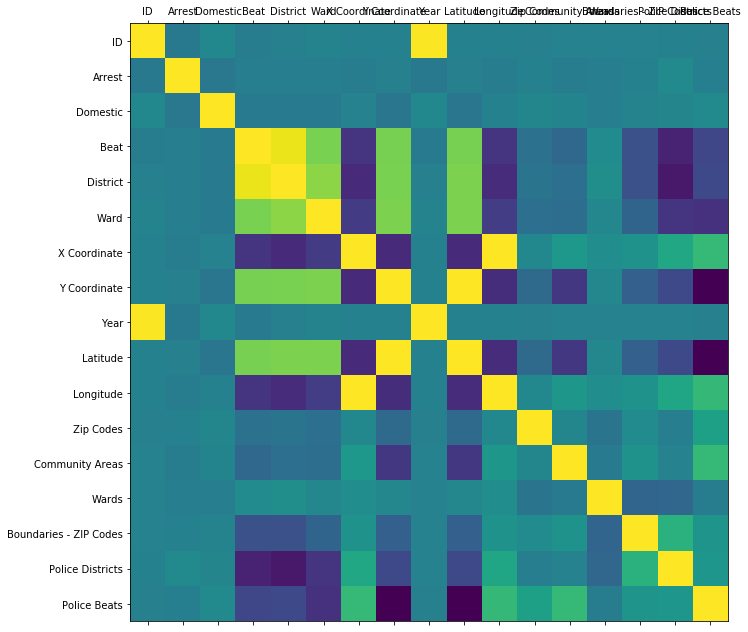

In [74]:
plot_corr(df)

In [78]:
df.drop(['X Coordinate', 'Y Coordinate', 'District', 'Beat'], axis=1, inplace=True)
#df.drop(['District', 'Beat'], axis=1, inplace=True)

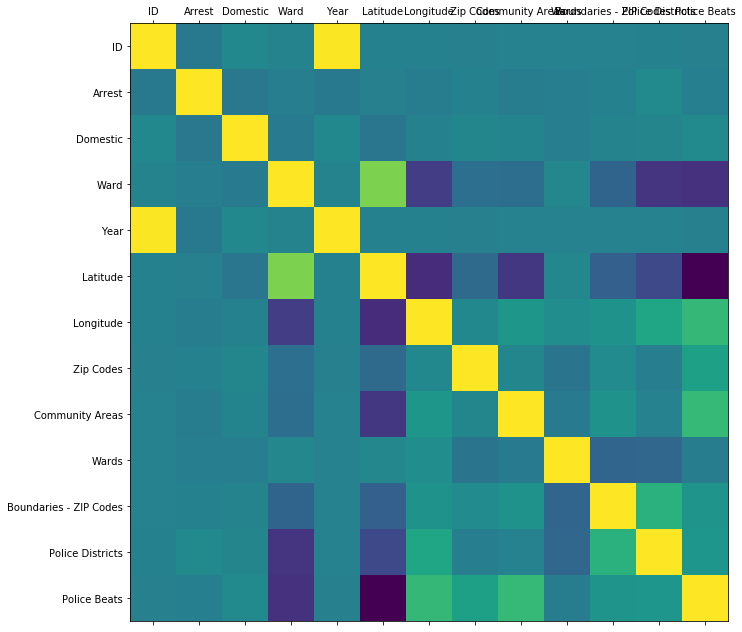

In [79]:
## Much better after removing the closely correlated data
plot_corr(df)

In [80]:
df.corr()

,ID,Arrest,Domestic,Ward,Year,Latitude,Longitude,Zip Codes,Community Areas,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
ID,1.000000,-0.061507,0.050428,0.019775,0.986794,0.003101,0.003072,-0.005232,0.008797,0.011860,0.011182,0.005646,-0.005419
Arrest,-0.061507,1.000000,-0.067336,-0.017989,-0.062498,-0.002211,-0.034366,0.003511,-0.031241,-0.017376,0.003393,0.064932,-0.009397
Domestic,0.050428,-0.067336,1.000000,-0.052810,0.051979,-0.082326,0.005743,0.033872,0.020925,-0.019220,0.013537,0.031686,0.073628
Ward,0.019775,-0.017989,-0.052810,1.000000,0.019351,0.651503,-0.455546,-0.126997,-0.135083,0.045358,-0.205217,-0.503135,-0.524310
Year,0.986794,-0.062498,0.051979,0.019351,1.000000,0.003139,0.004359,-0.005835,0.007826,0.011902,0.011841,0.007270,-0.006002
Latitude,0.003101,-0.002211,-0.082326,0.651503,0.003139,1.000000,-0.551402,-0.165269,-0.488573,0.043511,-0.232310,-0.388619,-0.779350
Longitude,0.003072,-0.034366,0.005743,-0.455546,0.004359,-0.551402,1.000000,0.048290,0.160235,0.090954,0.131395,0.274585,0.406430
Zip Codes,-0.005232,0.003511,0.033872,-0.126997,-0.005835,-0.165269,0.048290,1.000000,0.035829,-0.097246,0.077613,-0.017476,0.228789
Community Areas,0.008797,-0.031241,0.020925,-0.135083,0.007826,-0.488573,0.160235,0.035829,1.000000,-0.045329,0.124961,0.007511,0.414225
Wards,0.011860,-0.017376,-0.019220,0.045358,0.011902,0.043511,0.090954,-0.097246,-0.045329,1.000000,-0.199179,-0.194041,-0.029124


In [81]:
### make arrests binary using map function
arrests_map={True:1, False:0}
df['Arrest']=df['Arrest'].map(arrests_map)


In [83]:
### Write the file with cleaned data.
export_csv = df.to_csv (r'removed_columns_dropna_binaryarrest_corr.csv', index = None, header=True)

In [85]:
### Check distribution
num_obs = len(df)
num_true = len(df.loc[df['Arrest'] == 1])
num_false = len(df.loc[df['Arrest'] == 0])
print("Number of Arrest cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of No Arrest cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of Arrest cases:  1721369 (27.34%)
Number of No Arrest cases: 4575718 (72.66%)


In [87]:
### Splitting data for training and testing

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
feature_col_names = ['Primary Type', 'Location Description', 'Wards', 'Police Beats', 'Latitude', 'Longitude', 'Community Areas']
predicted_class_names = ['Arrest']

X = df[feature_col_names].values     # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

In [88]:
##We check to ensure we have the the desired 70% train, 30% test split of the data
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

70.00% in training set
30.00% in test set


In [89]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['Arrest'] == 1]), (len(df.loc[df['Arrest'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Arrest'] == 0]), (len(df.loc[df['Arrest'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 1721369 (27.34%)
Original False : 4575718 (72.66%)

Training True  : 1203511 (27.30%)
Training False : 3204449 (72.70%)

Test True      : 517858 (27.41%)
Test False     : 1371269 (72.59%)


In [ ]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

In [86]:
for col in df.columns: 
    print(col) 

ID
Date
Primary Type
Description
Location Description
Arrest
Domestic
Ward
FBI Code
Year
Updated On
Latitude
Longitude
Zip Codes
Community Areas
Wards
Boundaries - ZIP Codes
Police Districts
Police Beats


In [7]:
 ######################################################################
    ### Dropping non criminal incidents - think i will not drop these for now
#####################################################################
df = df[df['Primary Type'] != 'NON - CRIMINAL' ]
df = df[df['Primary Type'] != 'NON-CRIMINAL' ] 
df = df[df['Primary Type'] != 'NON-CRIMINAL (SUBJECT SPECIFIED)' ]

In [38]:
### Filter dataframe for the crimtypes you need and write it ##############

#crimetypes=['BURGLARY','ROBBERY', 'THEFT','NARCOTICS','HOMICIDE', 'BATTERY']

crime_df=df.rename(columns={"Primary Type": "CrimeType"})
crime_df_filtered= crime_df[(crime_df['CrimeType']  == 'NARCOTICS') | (crime_df['CrimeType'] == 'HOMICIDE') 
                            | (crime_df['CrimeType'] == 'BATTERY') | (crime_df['CrimeType'] == 'THEFT')
                           | (crime_df['CrimeType'] == 'BURGLARY') | (crime_df['CrimeType'] == 'ROBBERY' )
                           |(crime_df['CrimeType'] == 'ASSAULT') | (crime_df['CrimeType'] == 'MOTOR VEHICLE THEFT')]

#crime_df_filtered.head(5)
crime_df_filtered.CrimeType.unique()

export_csv = crime_df_filtered.to_csv (r'chicago_7_crimes_dataframe.csv', index = None, header=True)


In [33]:
crime_df_filtered.shape

(4131666, 30)

In [36]:
import seaborn
def get_sns(df,years, crime_types=[]):
    
    cols = list(df.columns.values)
    df1 = pd.DataFrame(columns=cols)   # empty data frame
    plt.figure(figsize = (15, 10))
    for crimetype in crime_types:
        df2=df.loc[(df['CrimeType']== crimetype) &  (df['Year' ] >= years[0]) & (df['Year' ] <= years[1]), : ]
        df1 = df1.append(df2, ignore_index = True)
    df1 = df1.dropna()
                   
    sns.countplot(y= 'Location Description', data = df1, order = \
              df1['Location Description'].value_counts().iloc[:18].index) 
    df.head()

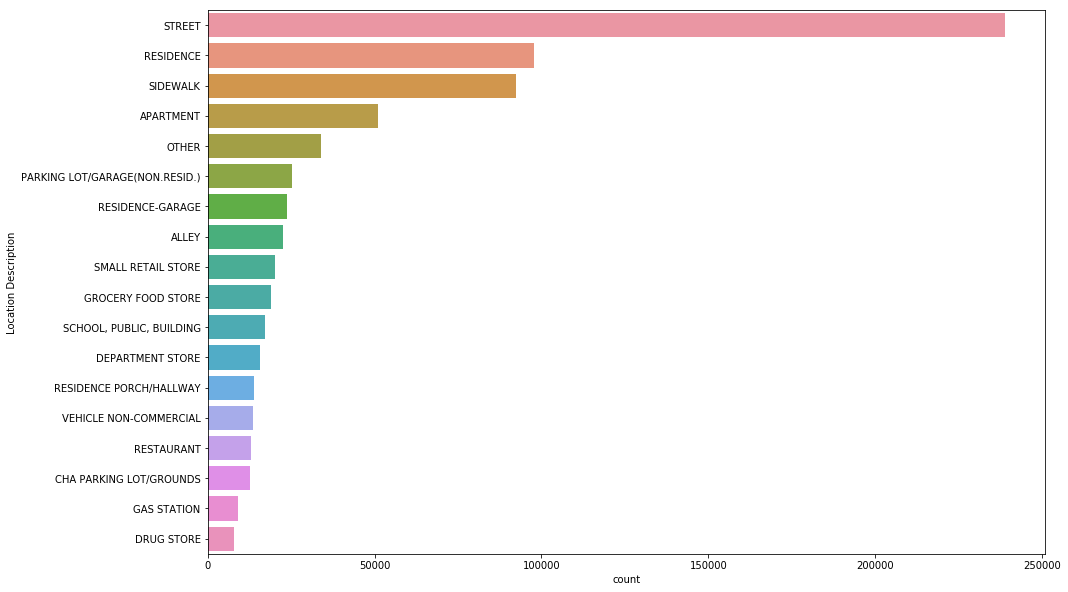

In [37]:
years=[2001, 2005]
get_sns(df = crime_df_filtered, years=years, \
                crime_types = ['ASSAULT', 'BURGLARY', 'NARCOTICS', 'HOMICIDE', 'THEFT', 'ROBBERY', 'MOTOR VEHICLE THEFT'])

In [47]:
def read_crime_filtered_data():
    
    file = os.path.join('Resources','chicago_7_crimes_dataframe.csv')
    crime_df_filtered = pd.read_csv(file)
    return crime_df_filtered

In [46]:
crime_df_filtered=read_crime_filtered_data()
crime_df_filtered.head(4)


,ID,Case Number,Date,Block,IUCR,CrimeType,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11859039,JC470679,10/12/2019 11:57:00 PM,039XX W MADISON ST,2092,NARCOTICS,SOLICIT NARCOTICS ON PUBLICWAY,PARKING LOT/GARAGE(NON.RESID.),True,False,...,-87.723882,"(41.880748488, -87.723881711)",11.0,21572.0,27.0,736.0,23.0,30.0,16.0,82.0
1,11859098,JC470671,10/12/2019 11:55:00 PM,018XX S ST LOUIS AVE,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,STREET,False,False,...,-87.712695,"(41.856209835, -87.712695108)",36.0,21569.0,30.0,800.0,14.0,57.0,21.0,153.0
2,11859480,JC471106,10/12/2019 11:49:00 PM,021XX W HOMER ST,0820,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,...,-87.680928,"(41.916925787, -87.680927881)",16.0,22535.0,23.0,373.0,40.0,1.0,7.0,192.0
3,11859053,JC470654,10/12/2019 11:45:00 PM,047XX S WESTERN AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,...,-87.684414,"(41.808028819, -87.684414463)",29.0,14924.0,55.0,85.0,3.0,56.0,23.0,115.0


In [34]:

crime_df_filtered = crime_df_filtered.dropna(axis = 0, how ='any') 

    

error: missing ), unterminated subpattern at position 0

In [42]:
import folium
chicago_map_crime = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

for i in range(10):
    lat = crime_df_filtered['Latitude'].iloc[i]
    long = crime_df_filtered['Longitude'].iloc[i]
    radius = 10

    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               crime_df_filtered['Location'].value_counts()
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = '#3db7e4', fill = True).add_to(chicago_map_crime)

chicago_map_crime.save('ChicagoMapPlotFoliums.html')    

In [39]:
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

m = folium.Map([41.8781, -87.6298], zoom_start=11)
for index, row in crime_df_filtered.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']],
                        radius=15,
                        popup=row['CrimeType'],
                        fill_color="#3db7e4", #  color
                       ).add_to(m)

KeyboardInterrupt: 

In [43]:
stationArr = crime_df_filtered[['Latitude', 'Longitude']].as_matrix()

# plot heatmap
chicago_map_crime.add_children(plugins.HeatMap(stationArr, radius=15))

#m.save('ChicagoMapPlotFoliums.html')

C:\Users\divya\Anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


NameError: name 'plugins' is not defined